In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

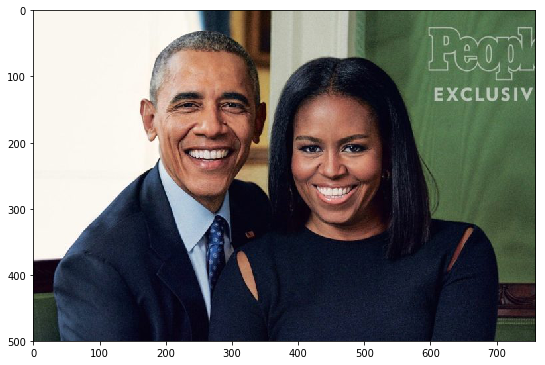

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

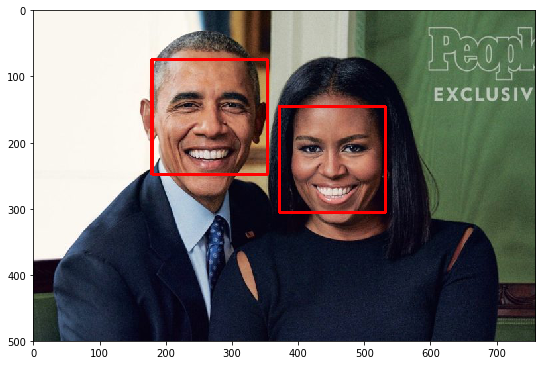

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')


faces = face_cascade.detectMultiScale(image, 1.2, 2)


image_with_detections = image.copy()

for (x,y,w,h) in faces:
    #
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading the trained model



In [5]:
import torch
from models import Net

net = Net()


net.load_state_dict(torch.load('saved_models/Tianbai_2ndtrial.pt'))


net.eval()

Net(
  (conv1): Conv2d (1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv3): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.6)
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear(in_features=80000, out_features=300)
  (fc1_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True)
  (dropout2): Dropout(p=0.5)
  (fc2): Linear(in_features=300, out_features=136)
)

In [6]:
len(faces)

2

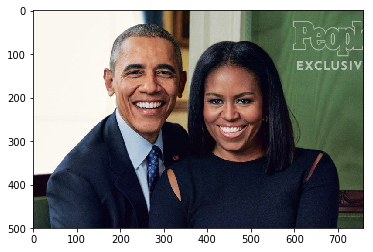

In [8]:
plt.imshow(image)

(280, 280)
(224, 224)
[[-0.46651563 -0.10387821]
 [-0.45322904  0.02832973]
 [-0.4239684   0.14550155]]
0.566921
(294, 294)
(224, 224)
[[-0.50987351 -0.1000997 ]
 [-0.50228691  0.03303749]
 [-0.48272341  0.15247764]]
0.497167


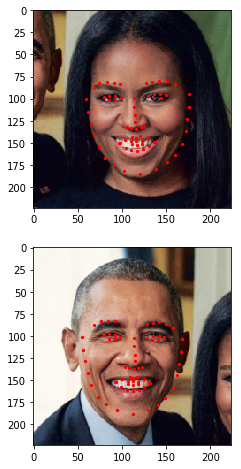

In [22]:
from torch.autograd import Variable

image_copy = np.copy(image)
pad = 60
# loop over the detected faces from your haar cascade
fig = plt.figure(figsize = (8,8))
for i,(x,y,w,h) in enumerate(faces):
    
    
    roi = image_copy[(y-pad):(y+h+pad), (x-pad):(x+w+pad)]
   
    roi_im = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    roi_im = roi_im/255
    print (roi_im.shape)
    
    roi_im = cv2.resize(roi_im, (224,224))
    print (roi_im.shape)
    im_plot = np.copy(roi)
    im_plot = cv2.resize(im_plot, (224,224))
    #Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi_im = roi_im.reshape(1,224,224,1)
    roi_im = roi_im.transpose(0,3,1,2)
    #print (roi_im.shape)
    
    roi_im = torch.from_numpy(roi_im)
    roi_im = Variable(roi_im)
    roi_im = roi_im.type(torch.FloatTensor)  
    pred_pts = net(roi_im)
    pred_pts = pred_pts.view(1,68,-1)
    predicted = pred_pts[0].data
    predicted = predicted.numpy()
    print (predicted[0:3])
    predicted_x = predicted[:,0]
    predicted_y = predicted[:,1]
    print (max(predicted_x))
    predicted_x = (predicted_x*112+112)
    predicted_y = (predicted_y*112+112)
    fig.add_subplot(2,1,i+1)
    plt.imshow(im_plot)
    plt.scatter(predicted_x,predicted_y,s =20, marker = '.', c ='r')    
    ## Display each detected face and the corresponding keypoints           
plt.show()